In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [128]:
daily_weather=pd.read_csv("C:\\tel dataset\\CVI DS\\daily_data.csv",parse_dates=["DATE"])

In [129]:
list(daily_weather.columns)

['STATION',
 'DATE',
 'REPORT_TYPE',
 'SOURCE',
 'BackupElements',
 'BackupElevation',
 'BackupEquipment',
 'BackupLatitude',
 'BackupLongitude',
 'BackupName',
 'DailyAverageDewPointTemperature',
 'DailyAverageDryBulbTemperature',
 'DailyAverageRelativeHumidity',
 'DailyAverageSeaLevelPressure',
 'DailyAverageStationPressure',
 'DailyAverageWetBulbTemperature',
 'DailyAverageWindSpeed',
 'DailyCoolingDegreeDays',
 'DailyDepartureFromNormalAverageTemperature',
 'DailyHeatingDegreeDays',
 'DailyMaximumDryBulbTemperature',
 'DailyMinimumDryBulbTemperature',
 'DailyPeakWindDirection',
 'DailyPeakWindSpeed',
 'DailyPrecipitation',
 'DailySnowDepth',
 'DailySnowfall',
 'DailySustainedWindDirection',
 'DailySustainedWindSpeed',
 'Sunrise',
 'Sunset',
 'WindEquipmentChangeDate']

<b>Daily Average Dew Point Temperature: </b> Dew point is the temperature at which air becomes saturated with water vapor, causing condensation to form. So, daily average dew point temperature refers to the average temperature at which dew would form throughout a 24-hour period.<br>
<b>Daily Average Dry Bulb Temperature: </b> The average temperature of the air measured with a standard thermometer, excluding any effects of moisture.<br>
<b>Daily Average Relative Humidity: </b> The average amount of moisture present in the air compared to the maximum amount it can hold at a specific temperature<br>
<b>Daily Average Sea Level Pressure: </b> The average atmospheric pressure at a location, adjusted to what it would be at sea level, calculated over a 24-hour period. <br>
<b>Daily Average Station Pressure: </b> The average atmospheric pressure measured at a specific weather station over a 24-hour period.<br>
<b>Daily Average Wet Bulb Temperature: </b>The average temperature measured by a wet-bulb thermometer over a 24-hour period. <br>
<b>Daily Precipitation: </b> The total amount of liquid or frozen precipitation (rain, snow, hail, etc.) that accumulates over a 24-hour period at a specific location. <br>

In [130]:
years = daily_weather["DATE"].dt.year.unique()
print(years)
print(len(years))

[2015 2016 2017 2018 2019 2020 2021 2022]
8


In [131]:
daily_weather["DATE"] = pd.to_datetime(daily_weather['DATE'])
daily_weather["Month"] = daily_weather["DATE"].dt.month
daily_weather["Year"] = daily_weather["DATE"].dt.year
daily_weather

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate,Month,Year
0,72518014735,2015-01-01 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0,0,0,190,20,726,1632,08-09-2006,1,2015
1,72518014735,2015-01-02 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,T,0,T,310,23,726,1633,08-09-2006,1,2015
2,72518014735,2015-01-03 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.57,0,1.6,160,15,726,1634,08-09-2006,1,2015
3,72518014735,2015-01-04 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.22,1,0,290,24,726,1635,08-09-2006,1,2015
4,72518014735,2015-01-05 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,T,0,T,290,32,726,1636,08-09-2006,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,72518014735,2022-05-27 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,0,0,0,160,21,423,1922,08-09-2006,5,2022
2664,72518014735,2022-05-28 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,0.04,0,0,310,22,422,1923,08-09-2006,5,2022
2665,72518014735,2022-05-29 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,0,0,0,180,9,421,1924,08-09-2006,5,2022
2666,72518014735,2022-05-30 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,0,0,0,190,12,421,1925,08-09-2006,5,2022


In [132]:
daily_weather["Month"].unique()

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  2])

In [133]:
daily_weather.drop("STATION",axis=1,inplace=True)

In [134]:
daily_weather

,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,DailyAverageDewPointTemperature,...,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate,Month,Year
0,2015-01-01 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",7,...,0,0,0,190,20,726,1632,08-09-2006,1,2015
1,2015-01-02 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",17,...,T,0,T,310,23,726,1633,08-09-2006,1,2015
2,2015-01-03 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",18,...,0.57,0,1.6,160,15,726,1634,08-09-2006,1,2015
3,2015-01-04 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",35,...,0.22,1,0,290,24,726,1635,08-09-2006,1,2015
4,2015-01-05 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",11,...,T,0,T,290,32,726,1636,08-09-2006,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,2022-05-27 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",63,...,0,0,0,160,21,423,1922,08-09-2006,5,2022
2664,2022-05-28 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",59,...,0.04,0,0,310,22,422,1923,08-09-2006,5,2022
2665,2022-05-29 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",50,...,0,0,0,180,9,421,1924,08-09-2006,5,2022
2666,2022-05-30 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",59,...,0,0,0,190,12,421,1925,08-09-2006,5,2022


In [135]:
daily_weather.shape

(2668, 33)

In [136]:
print("Missing values in daily weather dataset:\n",daily_weather.isnull().sum())

Missing values in daily weather dataset:
 DATE                                          0
REPORT_TYPE                                   0
SOURCE                                        0
BackupElements                                0
BackupElevation                               0
BackupEquipment                               0
BackupLatitude                                0
BackupLongitude                               0
BackupName                                    0
DailyAverageDewPointTemperature               0
DailyAverageDryBulbTemperature                0
DailyAverageRelativeHumidity                  0
DailyAverageSeaLevelPressure                  0
DailyAverageStationPressure                   0
DailyAverageWetBulbTemperature                0
DailyAverageWindSpeed                         0
DailyCoolingDegreeDays                        0
DailyDepartureFromNormalAverageTemperature    0
DailyHeatingDegreeDays                        0
DailyMaximumDryBulbTemperature                

In [137]:
daily_weather.describe()

,DATE,SOURCE,BackupElevation,BackupLatitude,BackupLongitude,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,...,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,Month,Year
count,2668,2668.0,2668.0,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,...,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000
mean,2018-10-01 14:07:27.346326784,6.0,260.0,42.689750,-73.828268,38.217766,50.107571,66.085082,30.031945,29.709059,...,59.418666,40.299100,222.387556,25.513493,223.924288,19.023238,563.145427,1783.491004,6.373688,2018.260495
min,2015-01-01 23:59:00,6.0,260.0,42.681200,-73.831090,-19.000000,-3.000000,24.000000,29.240000,28.890000,...,5.000000,-13.000000,10.000000,6.000000,10.000000,5.000000,416.000000,1621.000000,1.000000,2015.000000
25%,2016-11-29 17:59:00,6.0,260.0,42.691800,-73.831090,24.000000,35.000000,57.000000,29.880000,29.570000,...,42.000000,27.000000,170.000000,19.000000,170.000000,14.000000,447.000000,1658.000000,3.000000,2016.000000
50%,2018-10-02 11:59:00,6.0,260.0,42.691800,-73.831090,38.000000,51.000000,66.000000,30.020000,29.700000,...,60.000000,40.000000,260.000000,24.000000,270.000000,18.000000,547.000000,1805.000000,6.000000,2018.000000
75%,2020-08-03 05:59:00,6.0,260.0,42.691800,-73.831090,55.000000,67.000000,76.000000,30.180000,29.850000,...,77.000000,55.250000,290.000000,31.000000,290.000000,23.000000,650.000000,1905.000000,9.000000,2020.000000
max,2022-05-31 23:59:00,6.0,260.0,42.691800,-73.816500,73.000000,87.000000,100.000000,30.740000,30.420000,...,97.000000,77.000000,360.000000,70.000000,360.000000,67.000000,726.000000,1938.000000,12.000000,2022.000000
std,NaN,0.0,0.0,0.004187,0.005764,19.116250,18.747310,13.401359,0.223771,0.220846,...,20.003706,18.122395,90.828564,9.436276,90.846564,6.942113,108.536855,111.230222,3.455021,2.137385


In [138]:
daily_weather.describe(include = object)

,REPORT_TYPE,BackupElements,BackupEquipment,BackupName,DailyPrecipitation,DailySnowDepth,DailySnowfall,WindEquipmentChangeDate
count,2668,2668,2668,2668,2668,2668,2668,2668
unique,1,1,1,1,142,21,58,1
top,SOD,PRECIP,PLASTIC,"NWS ALBANY, NY",0,0,0,08-09-2006
freq,2668,2668,2668,2668,1106,2208,2116,2668


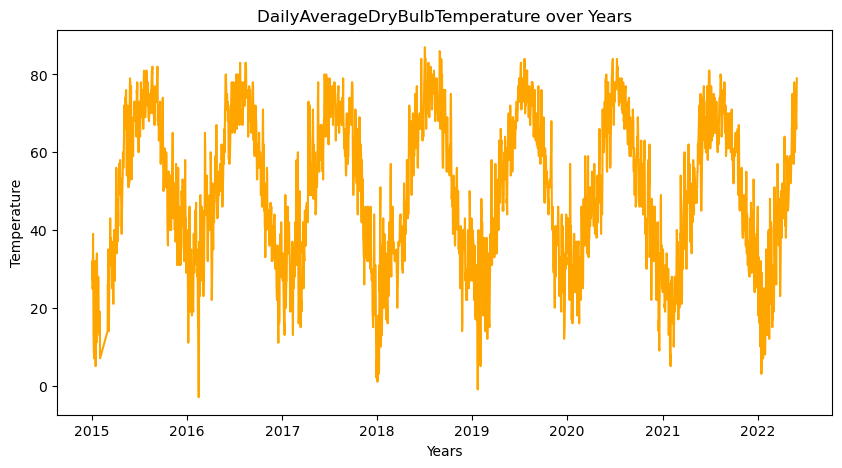

In [139]:
plt.figure(figsize=(10,5))
plt.plot(daily_weather["DATE"], daily_weather["DailyAverageDryBulbTemperature"],color="orange")
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.title("DailyAverageDryBulbTemperature over Years")
plt.show()

# Observations:
Here,We observed that in every year initial months are having low temperatures and in the middle of the year temperature raises and highest temperature is recorded. 

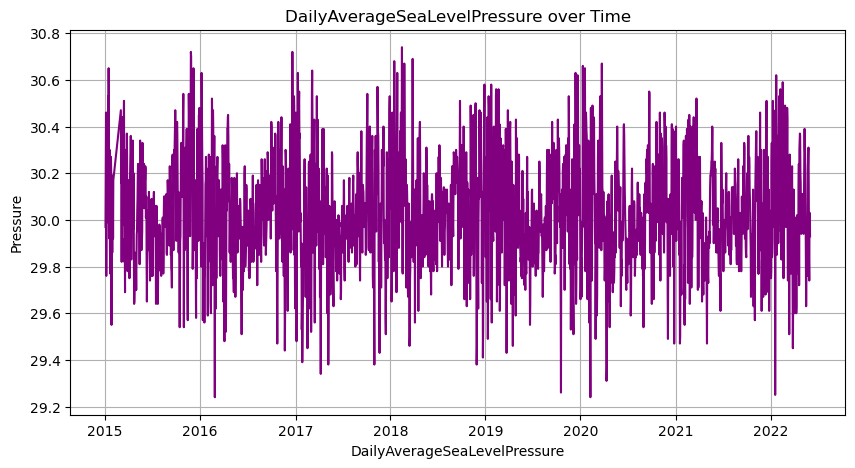

In [140]:
plt.figure(figsize=(10,5))
plt.plot(daily_weather["DATE"], daily_weather["DailyAverageSeaLevelPressure"],color="purple")
plt.xlabel("DailyAverageSeaLevelPressure")
plt.ylabel("Pressure")
plt.title("DailyAverageSeaLevelPressure over Time")
plt.grid(True)
plt.show()

In [141]:
daily_weather

,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,DailyAverageDewPointTemperature,...,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate,Month,Year
0,2015-01-01 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",7,...,0,0,0,190,20,726,1632,08-09-2006,1,2015
1,2015-01-02 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",17,...,T,0,T,310,23,726,1633,08-09-2006,1,2015
2,2015-01-03 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",18,...,0.57,0,1.6,160,15,726,1634,08-09-2006,1,2015
3,2015-01-04 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",35,...,0.22,1,0,290,24,726,1635,08-09-2006,1,2015
4,2015-01-05 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",11,...,T,0,T,290,32,726,1636,08-09-2006,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,2022-05-27 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",63,...,0,0,0,160,21,423,1922,08-09-2006,5,2022
2664,2022-05-28 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",59,...,0.04,0,0,310,22,422,1923,08-09-2006,5,2022
2665,2022-05-29 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",50,...,0,0,0,180,9,421,1924,08-09-2006,5,2022
2666,2022-05-30 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",59,...,0,0,0,190,12,421,1925,08-09-2006,5,2022


C:\Users\venkatesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\venkatesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\venkatesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\venkatesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

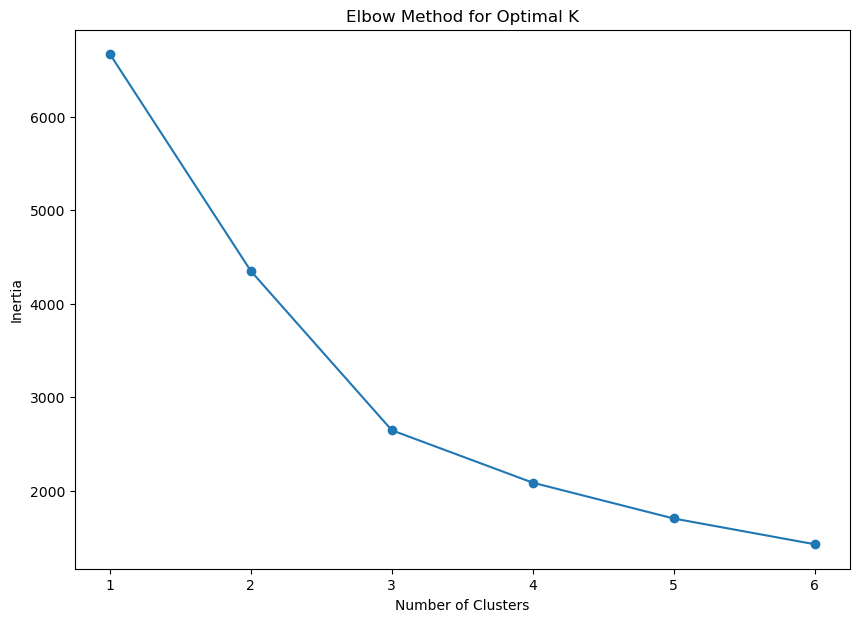

In [142]:
PCA_Features = ["DailyAverageDryBulbTemperature","DailyAverageSeaLevelPressure","DailyAverageWindSpeed"]
#Standardize the features
scaled_features = daily_weather[PCA_Features]
scaled_features = (scaled_features-scaled_features.mean())/scaled_features.std()
#Perform PCA
pca=PCA(n_components=2)
pri_comp=pca.fit_transform(scaled_features)
#Creating DataFrame for principal components
pri_df=pd.DataFrame(data=pri_comp,columns=["PC1","PC2"])
#Plot PCA: Elbow plot
inertia=[]
for i in range(1,7):
    kmeans=KMeans(n_clusters=i,random_state=0).fit(pri_df)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(range(1,7),inertia,marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

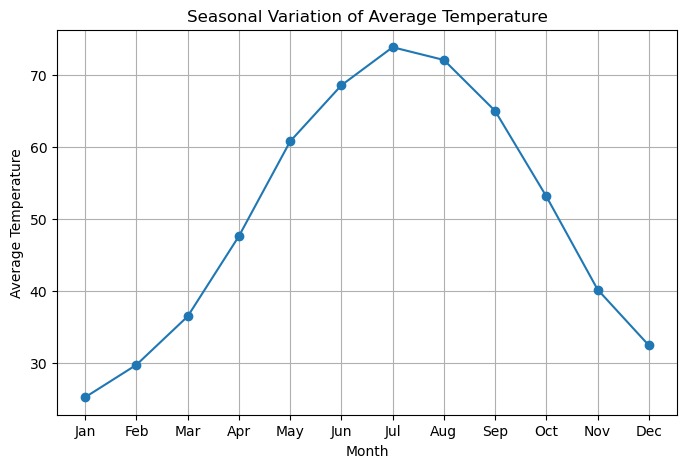

In [143]:
monthly_avg_temp = daily_weather.groupby(["Month"])["DailyAverageDryBulbTemperature"].mean()
plt.figure(figsize=(8,5))
plt.plot(monthly_avg_temp.index,monthly_avg_temp.values,marker="o",linestyle="-")
plt.title("Seasonal Variation of Average Temperature")
plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May',"Jun",'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.show()

C:\Users\venkatesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


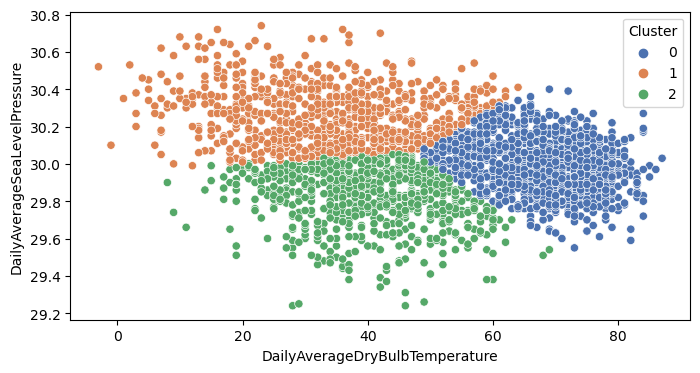

In [144]:
#Select features for clustering
features_for_clustering = ["DailyAverageDryBulbTemperature","DailyAverageSeaLevelPressure"]
#standardize the features
scaled_features = daily_weather[features_for_clustering]
scaled_features = (scaled_features-scaled_features.mean())/scaled_features.std()
#Perform clustering using KMeans
kmeans=KMeans(n_clusters=3)
daily_weather['Cluster']=kmeans.fit_predict(scaled_features)
#plot clusters
plt.figure(figsize=(8,4))
sns.scatterplot(x="DailyAverageDryBulbTemperature",y="DailyAverageSeaLevelPressure",hue="Cluster",data=daily_weather,palette="deep")
plt.show()

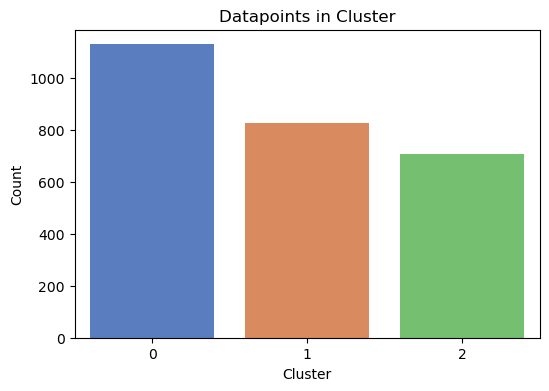

In [145]:
plt.figure(figsize=(6,4))
sns.countplot(x='Cluster',data=daily_weather,palette="muted")
plt.title("Datapoints in Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

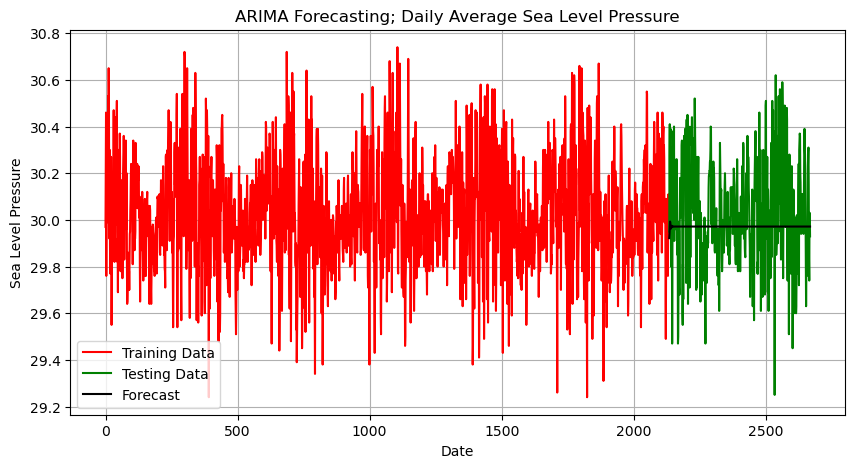

In [146]:
sea_pressure=daily_weather["DailyAverageSeaLevelPressure"]
#Split the data into training and testing sets
train_size=int(len(sea_pressure)*0.8)
train_data,test_data=sea_pressure[:train_size],sea_pressure[train_size:]
#fit ARIMA model
model=ARIMA(train_data,order=(5,1,0))
model_fit=model.fit()
#Forecast
forecast=model_fit.forecast(steps=len(test_data))
#plot actual vs forecast values
plt.figure(figsize=(10,5))
plt.plot(train_data.index,train_data,label='Training Data',color="red")
plt.plot(test_data.index,test_data,label='Testing Data',color="green")
plt.plot(test_data.index,forecast,label='Forecast',color='black')
plt.title("ARIMA Forecasting; Daily Average Sea Level Pressure")
plt.xlabel("Date")
plt.ylabel("Sea Level Pressure")
plt.legend()
plt.grid(True)
plt.show()

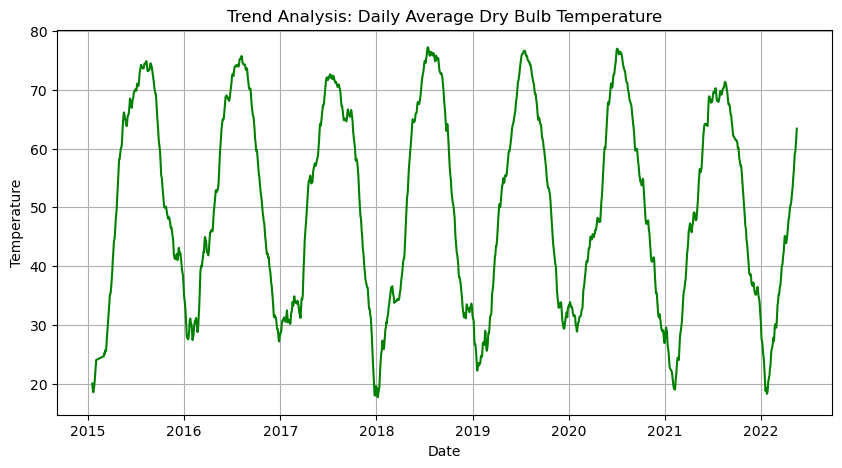

In [147]:
#Trend Analysis for a particular temperature column
temp_col="DailyAverageDryBulbTemperature"
decomp=seasonal_decompose(daily_weather[temp_col],period=30)
trend=decomp.trend
#plotting trend Analysis
plt.figure(figsize=(10,5))
plt.plot(daily_weather["DATE"],trend,color="green")
plt.title("Trend Analysis: Daily Average Dry Bulb Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

# Obsevations:
From the above analysis, We can conclude that,Every year in the initial months low temperatures are recording and increases until the middle months in the year like June,July high temperatures are recording and again the temperatures are falling to low at the ending months in year.<br>
We can conclude, June and July months are very hottest months and  December and January months are coolest months in the year 